<a href="https://colab.research.google.com/github/junsikcho/Programming-Basics/blob/main/%ED%94%84%EB%B0%8D%EA%B8%B0%EC%B4%88_Code(1303)_%EA%B0%9D%EC%B2%B4%EC%A7%80%ED%96%A5_%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 13장 03 객체지향 프로그래밍

- 객체지향 프로그래밍의 심화 내용\
1) 상속과 다형성의 개념을 이해하고 활용할 수 있다.\
2) 객체지향의 개념을 이용한 프로그램을 작성할 수 있다.

# 클래스의 특별한 메서드

-  __ del __() 메서드\
1) 소멸자(Destructor), 생성자와 반대로 인스턴스 삭제할 때 자동호출

- __ repr __() 메서드\
1) 인스턴스를 print()문으로 출력할 때 실행

- __ add __() 메서드\
1) 인스턴스 사이에 덧셈 작업이 일어날 때 실행되는 메서드, 인스턴스 사이의 덧셈 작업 가능

- 비교 메서드 : __ eq __(), __ ne __(), __ lt __(), __ gt __(), __ le __(), __ ge __()\
1) 인스턴스 사이의 비교 연산자(<, <=, >, >=, ==, !=등) 사용할 때 호출

In [1]:
#Code12-09.py

## 클래스 선언 부분 ##
class Line :
  length = 0
  def __init__(self, length) :
    self.length = length
    print(self.length, '길이의 선이 생성되었습니다.')

  def __del__(self) :
    print(self.length, '길이의 선이 삭제되었습니다.')

  def __repr__(self) :
    return '선의 길이 : ' + str(self.length)

  def __add__(self, other) :
    return self.length + other.length

  def __lt__(self, other) :
    return self.length < other.length

  def __gt__(self, other) :
    return self.length > other.length

## 메인 코드 부분 ##
myLine1 = Line(100)
myLine2 = Line(200)

print(myLine1)
print(myLine2)
print('두 선의 길이 합 : ', myLine1 + myLine2)

if myLine1 < myLine2 :
  print('선분 2가 더 기네요.')
elif myLine1 == myLine2 :
  print('두 선분이 같네요.')
else :
  print('모르겠네요.')

del(myLine1)

100 길이의 선이 생성되었습니다.
200 길이의 선이 생성되었습니다.
선의 길이 : 100
선의 길이 : 200
두 선의 길이 합 :  300
선분 2가 더 기네요.
100 길이의 선이 삭제되었습니다.


# 추상 메서드

- 서브 클래스에서 메서드를 오버라이딩 : 슈퍼 클래스에서는 빈 껍질의 메서드만 만들어 놓고 내용은 pass로 채움

In [2]:
#Code12-10.py

## 클래스 선언 부분 ##
class SuperClass :
  def method(self) :
    pass

class SubClass1 (SuperClass) :
  def method(self) :
    print('SubClass1에서 method()를 오버라이딩함')

class SubClass2 (SuperClass) :
  pass

# 4 ~ 13 행 : SuperClass 상속받은 SubClass1과 SubClass2 만듦

## 메인 코드 부분 ##
sub1 = SubClass1()
sub2 = SubClass2()
# 18 ~ 19 행 : 각 인스턴스 sub1과 sub2 생성

sub1.method()
sub2.method()
# 22 ~ 23 행 : 오버라이딩한 method() 호출

SubClass1에서 method()를 오버라이딩함


- 3 ~ 4행 method() 수정\
1) 오버라이딩하지 않았다는 Not Implement Error 발생

In [3]:
def method(self) :
  raise NotImplementedError()

# 멀티 스레드

- 프로그램 하나에서 여러 개를 동시에 처리할 수 있도록 제공하는 기능

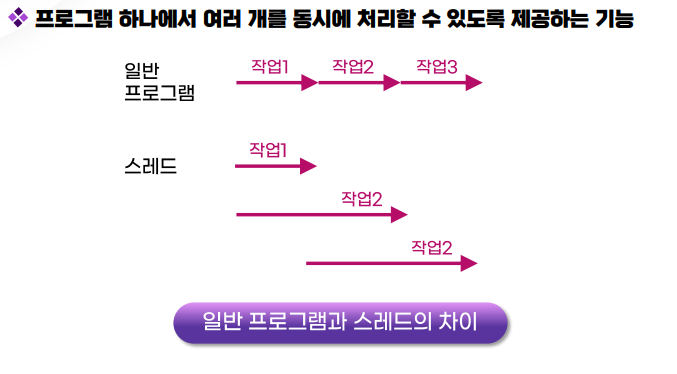

- 자동차 세 대가 경주하는 코드

In [10]:
#Code12-11.py

import time

## 클래스 선언 부분 ##
class RacingCar :
  carName = ''
  def __init__(self, name) :
    self.carName = name

  def runCar(self) :
    for _ in range(0, 3) :
      carStr = self.carName + '~~달립니다.\n'
      print(carStr, end = '')
      time.sleep(0.1) # 0.1초 멈춤

## 메인 코드 부분 ##
car1 = RacingCar('@자동차1')
car2 = RacingCar('#자동차2')
car3 = RacingCar('$자동차3')

car1.runCar()
car2.runCar()
car3.runCar()


@자동차1~~달립니다.
@자동차1~~달립니다.
@자동차1~~달립니다.
#자동차2~~달립니다.
#자동차2~~달립니다.
#자동차2~~달립니다.
$자동차3~~달립니다.
$자동차3~~달립니다.
$자동차3~~달립니다.


- 자동차 세 대를 동시에 출발

In [15]:
#Code12-12.py

import threading
import time

## 클래스 선언 부분 ##
class RacingCar :
  carName = ''
  def __init__(self, name) :
    self.carName = name

  def runCar(self) :
    for _ in range(0, 3) :
      carStr = self.carName + '~~달립니다.\n'
      print(carStr, end = '')
      time.sleep(0.1) # 0.1초 멈춤

## 메인 코드 부분 ##
car1 = RacingCar('@자동차1')
car2 = RacingCar('#자동차2')
car3 = RacingCar('$자동차3')

th1 = threading.Thread(target = car1.runCar)
th2 = threading.Thread(target = car2.runCar)
th3 = threading.Thread(target = car3.runCar)

th1.start()
th2.start()
th3.start()

@자동차1~~달립니다.
#자동차2~~달립니다.
$자동차3~~달립니다.
@자동차1~~달립니다.
#자동차2~~달립니다.
$자동차3~~달립니다.
@자동차1~~달립니다.
#자동차2~~달립니다.


# 멀티 프로세싱

- 동시에 CPU를 여러 개 사용

In [16]:
#Code12-13.py
import multiprocessing
import time

## 클래스 선언 부분 ##
class RacingCar :
  carName = ''
  def __init__(self, name) :
    self.carName = name

  def runCar(self) :
    for _ in range(0, 3) :
      carStr = self.carName + '~~달립니다.\n'
      print(carStr, end = '')
      time.sleep(0.1) # 0.1초 멈춤

## 메인 코드 부분 ##
if __name__=="__main__" :
  car1 = RacingCar('@자동차1')
  car2 = RacingCar('#자동차2')
  car3 = RacingCar('$자동차3')

  mp1 = multiprocessing.Process(target = car1.runCar)
  # multiprocessing.Process(target = 메서드 또는 함수, args = (매개변수)형식 사용 스레드 생성)
  mp2 = multiprocessing.Process(target = car2.runCar)
  mp3 = multiprocessing.Process(target = car3.runCar)

  mp1.start() # 프로세스 시작
  mp2.start()
  mp3.start()

  mp1.join()
  mp2.join()
  mp3.join()

@자동차1~~달립니다.
#자동차2~~달립니다.
$자동차3~~달립니다.
@자동차1~~달립니다.
#자동차2~~달립니다.
$자동차3~~달립니다.
@자동차1~~달립니다.
#자동차2~~달립니다.
$자동차3~~달립니다.
